# Prepare the environments for this set of experiments

In [13]:
import sys
sys.path.append('../../')
from panav.environment.env import NavigationEnv, WareHouse
from panav.viz import draw_env

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


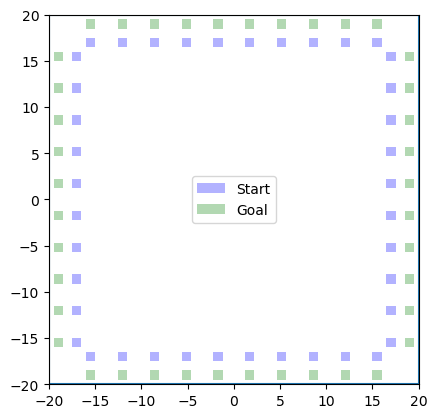

In [21]:
from matplotlib import pyplot as plt
from panav.environment.utils import peripheral_start_goals
# Square Opposition with no obstacles

limits = [(-20,20),(-20,20)]

N_agent = 40
specs = dict(corner_padding_x = 4.0,
corner_padding_y = 4.0,
bloating_r = 0.5,
limits = limits)

def OppositionSquare(limits,corner_padding_x,corner_padding_y,bloating_r,N_agent=0):
        env = NavigationEnv(limits=limits)
        env.starts, env.goals = peripheral_start_goals(limits,
                                                       corner_padding_x,
                                                       corner_padding_y,
                                                       bloating_r,
                                                       N_agent)
        env.calc_start_goal_regions()
        return env

env = OppositionSquare(**specs,N_agent=N_agent)
draw_env(env,obs_alpha=1.0)

env_info = {'specs':specs,'constructor':OppositionSquare}
env_name = 'OppositionSquare'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

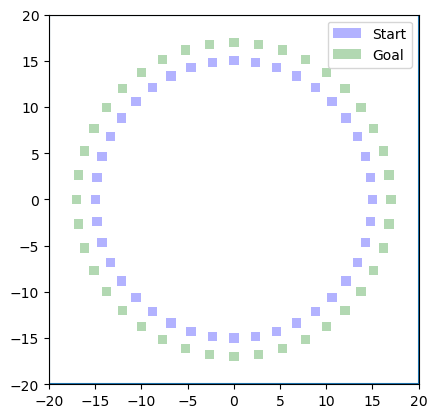

In [33]:
from matplotlib import pyplot as plt
from panav.environment.utils import peripheral_start_goals
import numpy as np

# Circular Opposition with no obstacles

def OppositionCircle(limits, center, outer_radius,inner_radius,N_agent):
    env = NavigationEnv(limits=limits)

    thetas = np.arange(N_agent)/N_agent * 2 * np.pi
    starts = inner_radius * np.vstack([np.cos(thetas),
                                    np.sin(thetas)]).T + center

    goals = outer_radius * np.vstack([np.cos(thetas),
                                    np.sin(thetas)]).T + center


    env.starts, env.goals = starts, goals
    env.calc_start_goal_regions()
    return env

N_agent = 40

specs = dict(limits = [(-20,20),(-20,20)],
center = np.array([0,0]),
outer_radius = 17,
inner_radius = 15)

env = OppositionCircle(**specs,N_agent=N_agent)

draw_env(env,obs_alpha=1.0)

env_info = {'specs':specs,'constructor':OppositionCircle}
env_name = 'OppositionCircle'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

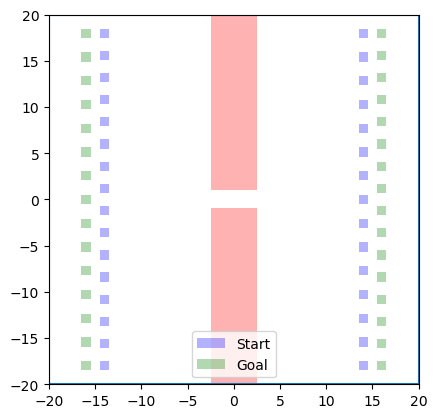

In [17]:
# Single Tunnel
bloating_r = 0.5

n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 1

env = MultiTunnelEnv(n_tunnel = n_tunnel, 
                     tunnel_width = bloating_r*3.9,
                     limits=limits, 
                     N_agent = max(n_agents))

specs = dict(n_tunnel = n_tunnel, 
        tunnel_width = bloating_r*3.9,
        limits=limits)

draw_env(env)

env_info = {'specs':specs,'constructor':MultiTunnelEnv}
env_name = 'SingleTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

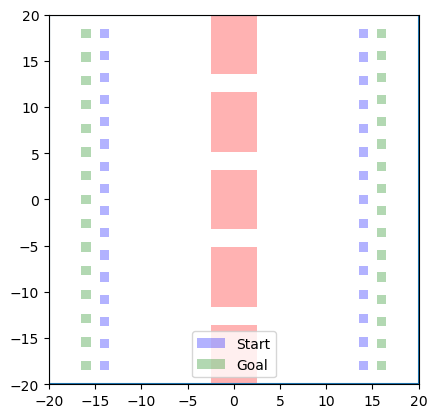

In [18]:
# Multi Tunnel
bloating_r = 0.5

n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 4

env = MultiTunnelEnv(n_tunnel = n_tunnel, 
                     tunnel_width = bloating_r*3.9,
                     limits=limits, 
                     N_agent = max(n_agents))
draw_env(env)

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits)

env_info = {'specs':specs,'constructor':MultiTunnelEnv}
env_name = 'MultiTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)